Task 3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

plt.style.use

<function matplotlib.style.core.use(style)>

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [4]:
df = pd.read_csv('input/bank.csv')
print(f"shape: {df.shape}")
df.head()

shape: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
# check for missing values
df.isnull().sum().to_frame('NaN value').T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
NaN value,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# check for duplicate values (same entries?)
# data.duplicated(subset=['age'])
duplicate_values_in_column = df[df.duplicated(subset=['age'])]
print("Duplicate values in 'age':", duplicate_values_in_column)

Duplicate values in 'age':        age          job   marital  education default  balance housing loan  \
6       56   management   married   tertiary      no      830     yes  yes   
18      41       admin.   married  secondary      no       55     yes   no   
19      49       admin.  divorced  secondary      no      168     yes  yes   
20      28       admin.  divorced  secondary      no      785     yes   no   
22      43   management  divorced   tertiary      no      388     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
11157   33  blue-collar    single    primary      no        1     yes   no   
11158   39     services   married  secondary      no      733      no   no   
11159   32   technician    single  secondary      no       29      no   no   
11160   43   technician   married  secondary      no        0      no  yes   
11161   34   technician   married  secondary      no        0      no   no   

        contact  day month  duration

In [15]:
# remove jobs with unknown values
data = df.dropna(subset=['job'])
data = df[df['job'] != 'unknown']
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [16]:
data.loc[data['job'] == 'admin.', 'job'] = 'management'
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [17]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.111255,0.000746,0.000635,-0.005722,0.002572,0.020386
balance,0.111255,1.000000,0.009914,0.022187,-0.014836,0.017893,0.031464
day,0.000746,0.009914,1.000000,-0.017971,0.136007,-0.076278,-0.058574
duration,0.000635,0.022187,-0.017971,1.000000,-0.041160,-0.029448,-0.027562
campaign,-0.005722,-0.014836,0.136007,-0.041160,1.000000,-0.102041,-0.049019
pdays,0.002572,0.017893,-0.076278,-0.029448,-0.102041,1.000000,0.507111
previous,0.020386,0.031464,-0.058574,-0.027562,-0.049019,0.507111,1.000000


Correlation Matrix

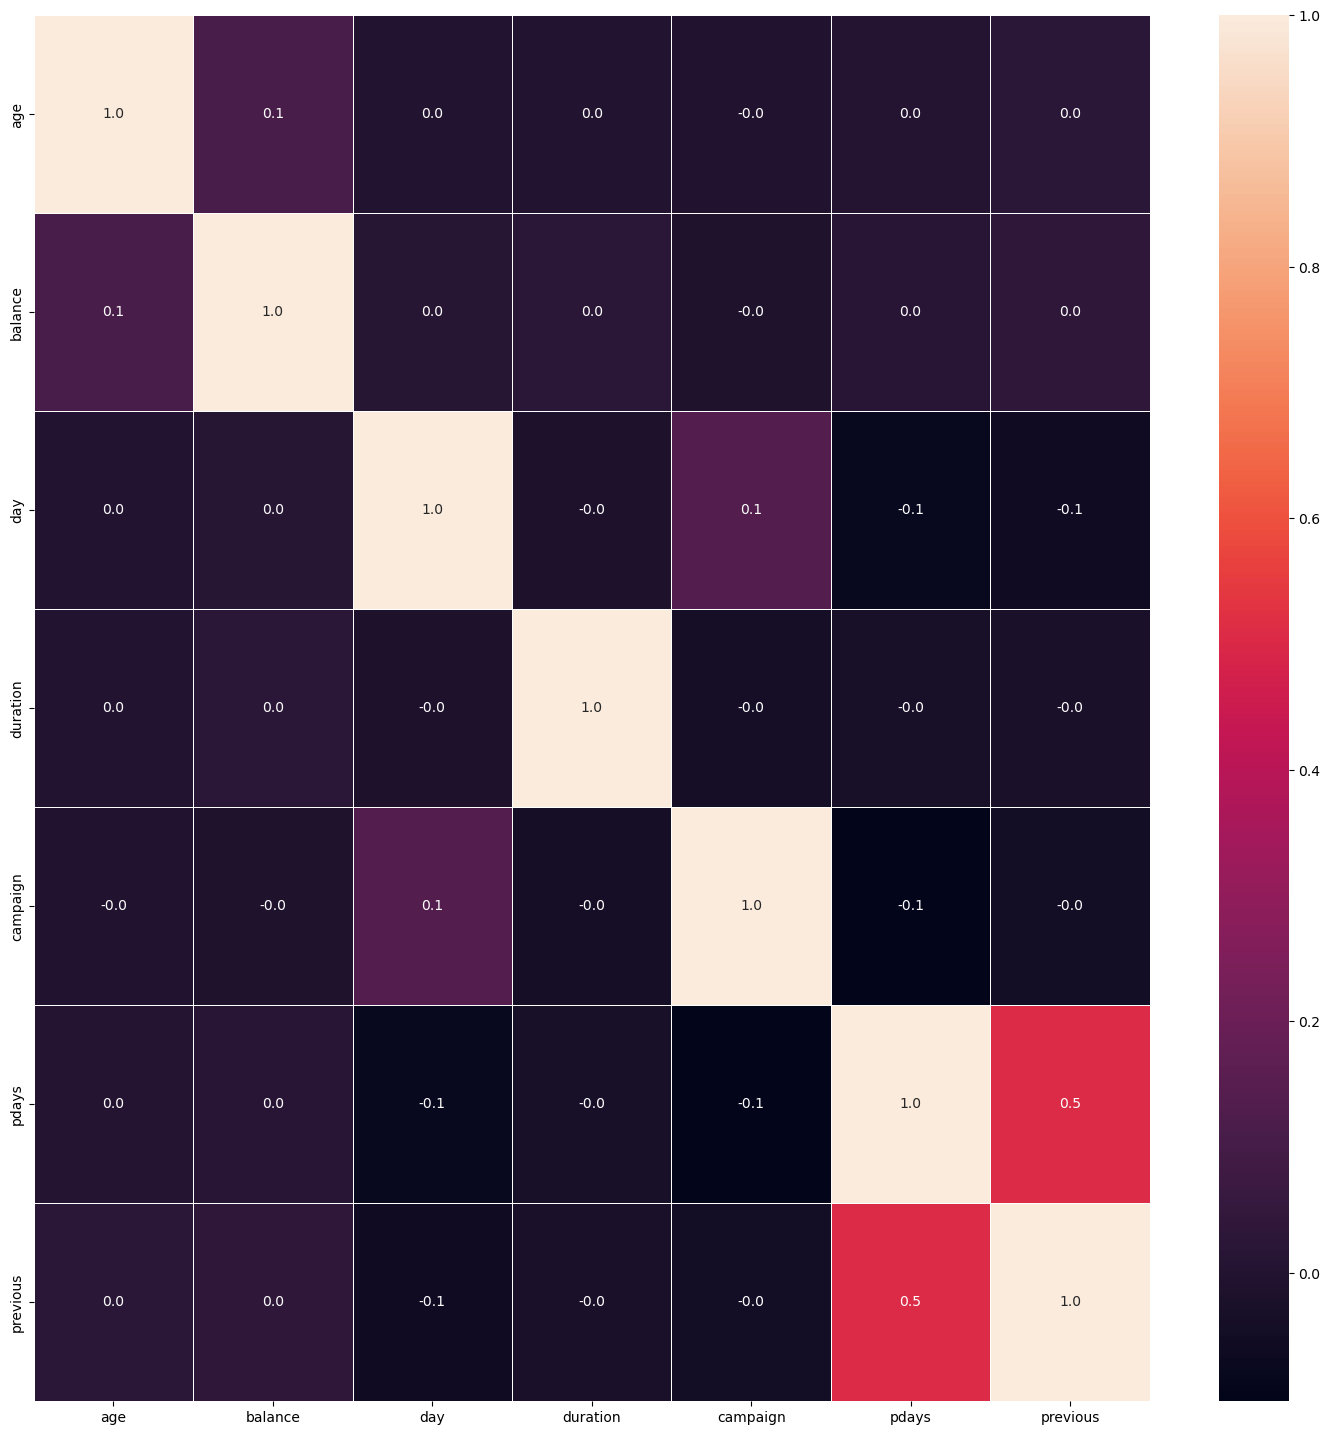

In [19]:
font = {'fontsize':16, 'fontstyle': 'italic', 'backgroundcolor':'darkblue', 'color':'white'}
f, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(data.corr(), annot=True, linewidths = .5, fmt = '.1f', ax=ax)
plt.show()

Univariate analysis using KDE Graph

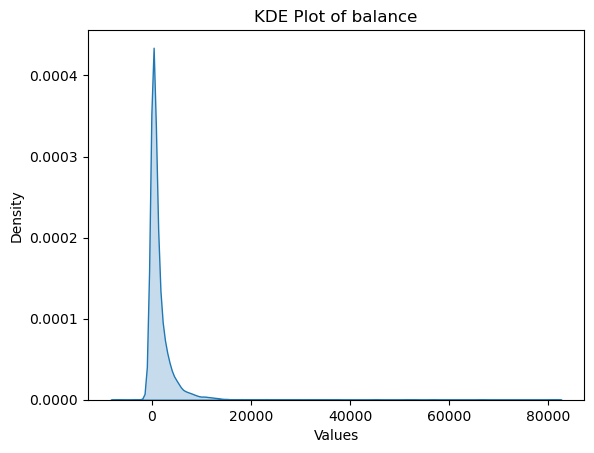

In [29]:
font = {'fontsize':16, 'fontstyle': 'italic', 'backgroundcolor':'darkblue', 'color':'white'}
%matplotlib inline
sns.kdeplot(data['balance'], shade=True)
plt.title('KDE Plot of {}'.format('balance'))
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

Bivariate Analysis using Scatterplot

In [22]:
# Balance vs. Occupation
# Loans vs. Education

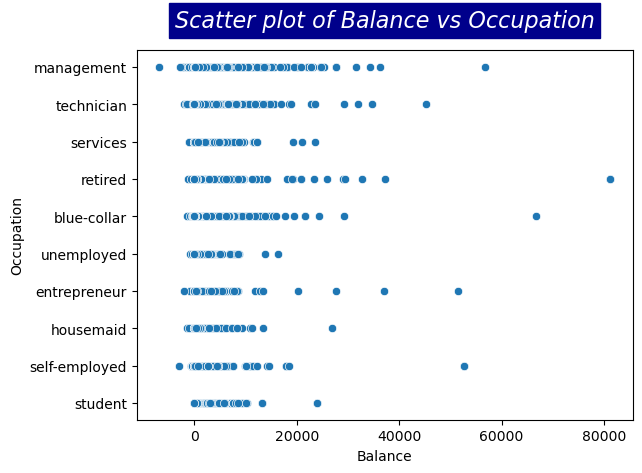

In [28]:
%matplotlib inline
sns.scatterplot(data=data, x='balance', y='job')
plt.title('Scatter plot of Balance vs Occupation', y=1.04, fontdict=font)
plt.xlabel('Balance')
plt.ylabel('Occupation')
plt.show()

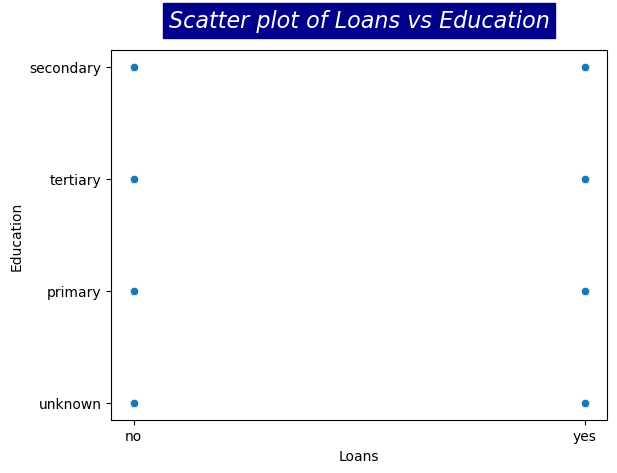

In [31]:
%matplotlib inline
sns.scatterplot(data=data, x='loan', y='education')
plt.title('Scatter plot of Loans vs Education', y=1.04, fontdict=font)
plt.xlabel('Loans')
plt.ylabel('Education')
plt.show()

Train a Naive Bayes Classifier
---Provide Model Performance--